**Masukkan Data**

In [ ]:
from matplotlib import pyplot
import matplotlib as plt
import pandas as pd
import numpy as np

In [ ]:
#Membaca Data
data = pd.read_csv('radiasi.txt', sep=';', header=0, low_memory=False, infer_datetime_format=True, parse_dates={'datetime':[0,1]}, index_col=['datetime'])
#Hasil 5 teratas
print(data.head())

                     radiasi
datetime                    
2010-01-01 06:00:00    29.77
2010-01-01 07:00:00   220.42
2010-01-01 08:00:00   467.60
2010-01-01 09:00:00   682.42
2010-01-01 10:00:00   842.62


In [ ]:
#load data actual
data1 = pd.read_csv('radiasi.txt', sep=';', header=0, low_memory=False)
df = data1
df

,date,time,radiasi
0,01/01/2010,06:00:00,29.77
1,01/01/2010,07:00:00,220.42
2,01/01/2010,08:00:00,467.60
3,01/01/2010,09:00:00,682.42
4,01/01/2010,10:00:00,842.62
...,...,...,...
48583,31/01/2021,13:00:00,928.88
48584,31/01/2021,14:00:00,810.90
48585,31/01/2021,15:00:00,629.05
48586,31/01/2021,16:00:00,406.50


**Visualisasi Plot Time Series**

Text(0, 0.5, 'Radiasi')

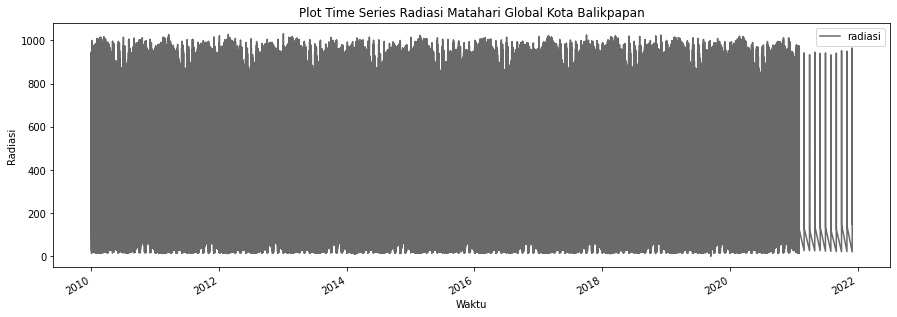

In [ ]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

ax = data.plot(color='dimgrey',figsize=(15,5),title='Plot Time Series Radiasi Matahari Global Kota Balikpapan');
ax.set_xlabel("Waktu")
ax.set_ylabel("Radiasi")

Text(0, 0.5, 'Radiasi')

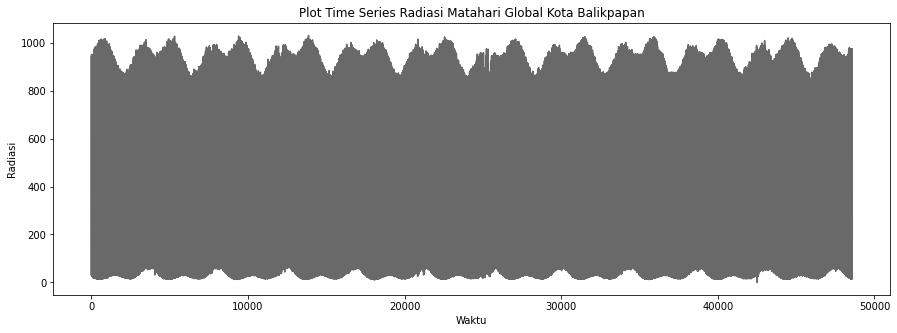

In [ ]:
import matplotlib as plt

ax = df['radiasi'].plot(color='dimgrey',figsize=(15,5),title='Plot Time Series Radiasi Matahari Global Kota Balikpapan');
ax.set_xlabel("Waktu")
ax.set_ylabel("Radiasi")

In [ ]:
sample = df[:84]

Text(0, 0.5, 'Radiasi')

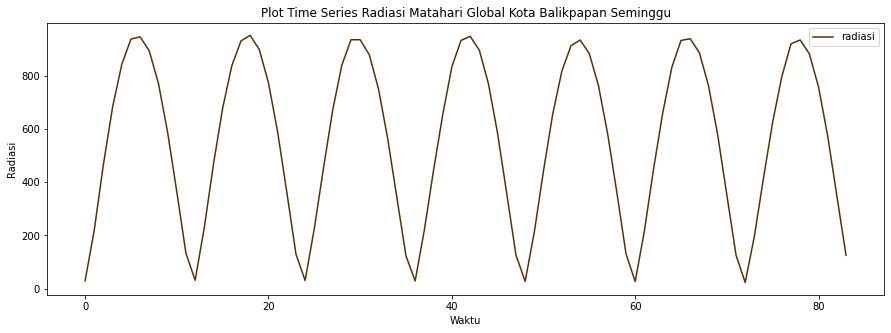

In [ ]:
import matplotlib as plt

ax = sample.plot(colormap='BrBG',figsize=(15,5),title='Plot Time Series Radiasi Matahari Global Kota Balikpapan Seminggu');
ax.set_xlabel("Waktu")
ax.set_ylabel("Radiasi")

**Visualisasi Plot Musiman Harian**

In [ ]:
data1 = pd.read_csv('radiasi.txt', sep=';', header=0, low_memory=False)
df = data1

In [ ]:
import pandas as pd
from datetime import datetime

df['date'] = pd.DatetimeIndex(df['date']).day_name()
dfa = pd.DataFrame(df, columns=['date', 'time', 'radiasi'])
dfa

,date,time,radiasi
0,Friday,06:00:00,29.77
1,Friday,07:00:00,220.42
2,Friday,08:00:00,467.60
3,Friday,09:00:00,682.42
4,Friday,10:00:00,842.62
...,...,...,...
48583,Sunday,13:00:00,928.88
48584,Sunday,14:00:00,810.90
48585,Sunday,15:00:00,629.05
48586,Sunday,16:00:00,406.50


In [ ]:
dfb = dfa.groupby(['time','date'])['radiasi'].mean().unstack(fill_value=0).reset_index().rename_axis(None, axis=1)
dfb

,time,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,06:00:00,31.681036,31.798342,31.697266,31.743651,31.644750,31.727314,31.759102
1,07:00:00,213.516563,213.854922,214.096125,213.529152,213.495078,213.598839,213.365354
2,08:00:00,441.564698,441.608687,441.578858,441.895779,441.071261,440.843830,441.526339
3,09:00:00,654.075751,654.288394,655.317578,654.810069,653.474352,653.534887,654.689965
4,10:00:00,821.029223,820.391054,821.072284,820.950069,820.105751,820.230919,820.944560
5,11:00:00,916.275630,915.363972,916.602232,916.700087,915.748238,915.810225,916.189585
6,12:00:00,931.811917,931.464352,931.252180,931.037976,930.046114,932.467331,931.125596
7,13:00:00,873.875285,873.524301,873.566972,873.526782,872.286995,874.612860,873.145233
8,14:00:00,744.101019,743.716269,744.059862,743.752872,742.770898,745.047158,743.568774
9,15:00:00,555.223143,554.787979,555.553910,554.724239,554.141174,556.262132,554.876373


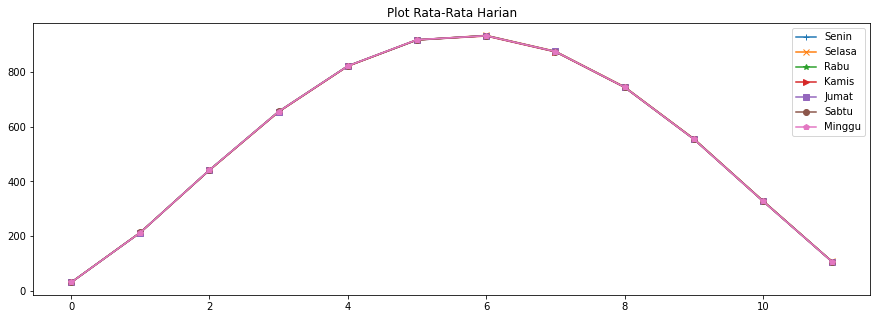

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (15,5)

plt.plot(dfb['Monday'],  '-+', label='Senin')
plt.plot(dfb['Tuesday'],  '-x', label='Selasa')
plt.plot(dfb['Wednesday'],  '-*', label='Rabu')
plt.plot(dfb['Thursday'],  '->', label='Kamis')
plt.plot(dfb['Friday'],  '-s', label='Jumat')
plt.plot(dfb['Saturday'],  '-o', label='Sabtu')
plt.plot(dfb['Sunday'],  '-p', label='Minggu')

plt.title('Plot Rata-Rata Harian')
plt.legend(fontsize=10,ncol=1)
plt.show()

**Visualisasi Plot Musiman Mingguan**

In [ ]:
data1 = pd.read_csv('radiasi.txt', sep=';', header=0, low_memory=False)
df = data1

In [ ]:
import pandas as pd
from datetime import datetime

df['date'] = pd.DatetimeIndex(df['date']).week
dfg = pd.DataFrame(df, columns=['date', 'time', 'radiasi'])
dfg

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  after removing the cwd from sys.path.


,date,time,radiasi
0,53,06:00:00,29.77
1,53,07:00:00,220.42
2,53,08:00:00,467.60
3,53,09:00:00,682.42
4,53,10:00:00,842.62
...,...,...,...
48583,4,13:00:00,928.88
48584,4,14:00:00,810.90
48585,4,15:00:00,629.05
48586,4,16:00:00,406.50


In [ ]:
dfh = dfg.groupby(['time','date'])['radiasi'].mean().unstack(fill_value=0).reset_index().rename_axis(None, axis=1)
dfh

,time,1,2,3,4,5,6,7,8,9,...,44,45,46,47,48,49,50,51,52,53
0,06:00:00,24.467662,35.002927,19.555476,16.810000,20.362821,31.255455,22.668182,14.712208,19.344487,...,42.258333,33.816623,65.585195,66.078052,48.260769,28.763896,45.651688,39.142078,32.732597,26.235333
1,07:00:00,201.372727,218.679146,192.484286,185.774643,195.906026,212.735974,196.340390,183.947273,193.837949,...,232.290641,214.290390,273.683117,277.335065,244.029359,207.287273,239.846494,232.431039,220.212987,209.290667
2,08:00:00,431.336494,447.521463,424.085119,420.080476,430.534103,438.540000,434.193377,424.731948,430.761923,...,463.541923,439.684935,501.423247,505.482857,472.520769,433.504675,466.294156,458.914935,448.710260,441.506000
3,09:00:00,645.874026,659.125000,644.492738,643.509286,651.576923,649.240260,661.491299,657.445844,658.748846,...,677.886154,652.137532,709.765714,709.861948,682.107179,645.191039,674.146883,667.180779,660.552727,657.116667
4,10:00:00,814.966104,824.538293,820.972619,823.365833,827.966026,814.772597,843.357532,847.018182,837.411795,...,844.614487,816.269481,863.174545,863.099610,843.659487,811.199351,833.483377,828.267922,825.201429,827.022667
5,11:00:00,915.048312,919.262439,928.525833,934.603214,935.295128,909.136364,952.528571,963.301558,946.841026,...,936.812821,908.104545,940.510519,940.635455,931.624487,907.284545,921.112468,917.779351,919.473247,926.778000
6,12:00:00,940.420649,933.556707,956.480714,965.980952,961.098333,926.090390,978.200649,997.721948,975.673462,...,946.108462,922.745065,937.484935,939.937403,942.959359,924.600519,930.478442,932.265584,936.980260,942.564000
7,13:00:00,887.957662,874.329878,910.696667,922.950476,914.020513,867.970519,929.866494,954.103506,927.946923,...,883.300769,862.134156,860.446234,864.111688,876.854744,868.126104,863.768182,871.735325,880.038831,890.281333
8,14:00:00,762.583896,743.676341,791.085119,804.966667,792.918974,738.847403,805.216883,833.495455,804.924487,...,747.007949,730.795584,713.806104,718.344156,739.663333,740.087922,727.732468,740.441948,752.515974,765.892667
9,15:00:00,577.093247,553.807805,609.400000,623.696071,609.617821,550.431948,616.875325,646.991429,618.074872,...,551.139103,541.358182,511.409740,516.483377,544.851282,553.293377,534.052857,551.481429,566.612208,580.214000


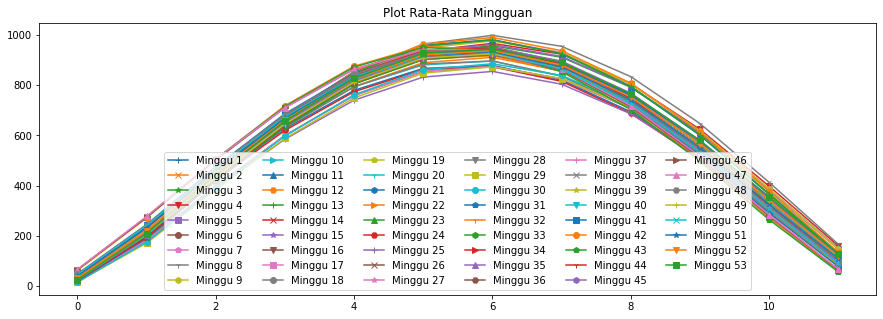

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (15, 5)


plt.plot(dfh[1],  '-+', label='Minggu 1')
plt.plot(dfh[2],  '-x', label='Minggu 2')
plt.plot(dfh[3],  '-*', label='Minggu 3')
plt.plot(dfh[4],  '-v', label='Minggu 4')
plt.plot(dfh[5],  '-s', label='Minggu 5')
plt.plot(dfh[6],  '-o', label='Minggu 6')
plt.plot(dfh[7],  '-p', label='Minggu 7')
plt.plot(dfh[8],  '-1', label='Minggu 8')
plt.plot(dfh[9],  '-h', label='Minggu 9')
plt.plot(dfh[10],  '->', label='Minggu 10')
plt.plot(dfh[11],  '-^', label='Minggu 11')
plt.plot(dfh[12],  '-H', label='Minggu 12')
plt.plot(dfh[13],  '-+', label='Minggu 13')
plt.plot(dfh[14],  '-x', label='Minggu 14')
plt.plot(dfh[15],  '-*', label='Minggu 15')
plt.plot(dfh[16],  '-v', label='Minggu 16')
plt.plot(dfh[17],  '-s', label='Minggu 17')
plt.plot(dfh[18],  '-o', label='Minggu 18')
plt.plot(dfh[19],  '-p', label='Minggu 19')
plt.plot(dfh[20],  '-1', label='Minggu 20')
plt.plot(dfh[21],  '-h', label='Minggu 21')
plt.plot(dfh[22],  '->', label='Minggu 22')
plt.plot(dfh[23],  '-^', label='Minggu 23')
plt.plot(dfh[24],  '-H', label='Minggu 24')
plt.plot(dfh[25],  '-+', label='Minggu 25')
plt.plot(dfh[26],  '-x', label='Minggu 26')
plt.plot(dfh[26],  '-*', label='Minggu 27')
plt.plot(dfh[28],  '-v', label='Minggu 28')
plt.plot(dfh[29],  '-s', label='Minggu 29')
plt.plot(dfh[30],  '-o', label='Minggu 30')
plt.plot(dfh[31],  '-p', label='Minggu 31')
plt.plot(dfh[32],  '-1', label='Minggu 32')
plt.plot(dfh[33],  '-h', label='Minggu 33')
plt.plot(dfh[34],  '->', label='Minggu 34')
plt.plot(dfh[35],  '-^', label='Minggu 35')
plt.plot(dfh[36],  '-H', label='Minggu 36')
plt.plot(dfh[37],  '-+', label='Minggu 37')
plt.plot(dfh[38],  '-x', label='Minggu 38')
plt.plot(dfh[39],  '-*', label='Minggu 39')
plt.plot(dfh[40],  '-v', label='Minggu 40')
plt.plot(dfh[41],  '-s', label='Minggu 41')
plt.plot(dfh[42],  '-o', label='Minggu 42')
plt.plot(dfh[43],  '-p', label='Minggu 43')
plt.plot(dfh[44],  '-1', label='Minggu 44')
plt.plot(dfh[45],  '-h', label='Minggu 45')
plt.plot(dfh[46],  '->', label='Minggu 46')
plt.plot(dfh[47],  '-^', label='Minggu 47')
plt.plot(dfh[48],  '-H', label='Minggu 48')
plt.plot(dfh[49],  '-+', label='Minggu 49')
plt.plot(dfh[50],  '-x', label='Minggu 50')
plt.plot(dfh[51],  '-*', label='Minggu 51')
plt.plot(dfh[52],  '-v', label='Minggu 52')
plt.plot(dfh[53],  '-s', label='Minggu 53')

plt.title('Plot Rata-Rata Mingguan')
plt.legend(fontsize=10,ncol=6)
plt.show()

**Visualisasi Plot Musiman Bulanan**

In [ ]:
data1 = pd.read_csv('radiasi.txt', sep=';', header=0, low_memory=False)
df = data1

In [ ]:
import pandas as pd
from datetime import datetime

df['date'] = pd.DatetimeIndex(df['date']).month_name()
dfc = pd.DataFrame(df, columns=['date', 'time', 'radiasi'])
dfc

,date,time,radiasi
0,January,06:00:00,29.77
1,January,07:00:00,220.42
2,January,08:00:00,467.60
3,January,09:00:00,682.42
4,January,10:00:00,842.62
...,...,...,...
48583,January,13:00:00,928.88
48584,January,14:00:00,810.90
48585,January,15:00:00,629.05
48586,January,16:00:00,406.50


In [ ]:
dfd = dfc.groupby(['time','date'])['radiasi'].mean().unstack(fill_value=0).reset_index().rename_axis(None, axis=1)
dfd

,time,April,August,December,February,January,July,June,March,May,November,October,September
0,06:00:00,30.732568,26.107865,35.165936,22.094071,22.968283,22.401579,25.351390,24.843947,30.929912,51.611662,51.784064,36.879033
1,07:00:00,216.948399,202.879825,222.469591,197.200801,197.812604,188.360848,194.638580,205.982281,212.731491,249.160363,250.466696,225.441752
2,08:00:00,446.032538,430.837339,449.919912,432.702724,429.670222,407.725643,411.141843,442.777222,433.914854,476.548097,481.471053,455.188369
3,09:00:00,660.346979,645.573860,660.626842,656.818654,648.005900,615.117427,612.824169,666.120146,638.123480,685.797885,693.190702,670.162387
4,10:00:00,828.035378,813.879942,824.455351,835.606827,821.949474,779.447281,771.839607,842.316023,796.557105,844.601148,854.585965,835.991813
5,11:00:00,923.267009,911.386374,917.658275,942.899359,926.486648,877.347456,865.249215,945.635205,886.956930,929.247432,939.635731,928.605710
6,12:00:00,939.292205,929.712632,933.250760,969.139615,952.168199,897.596111,884.423233,967.326579,902.031170,935.907704,935.420322,930.537009
7,13:00:00,879.865710,874.489298,874.068684,919.710096,902.965429,846.658684,830.797372,912.587018,843.352193,867.116858,864.824357,866.437946
8,14:00:00,748.472961,746.835380,743.992135,795.376731,780.328338,725.364971,708.152508,783.121637,715.569825,727.867674,722.144854,729.600302
9,15:00:00,557.525378,558.979708,555.473158,607.945064,596.224515,545.710380,528.895196,591.288421,530.812310,531.476405,522.450000,534.349335


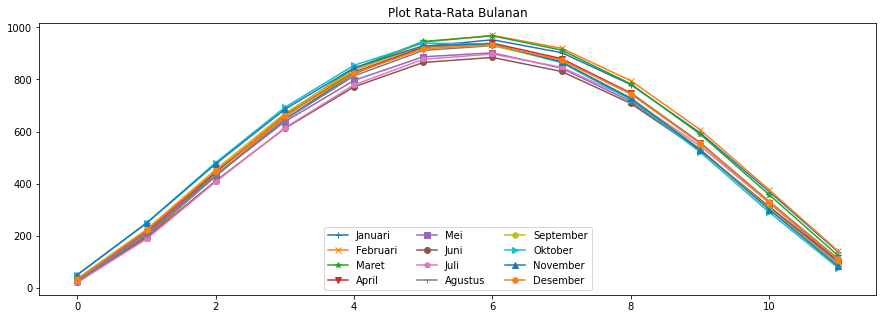

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (15, 5)


plt.plot(dfd['January'],  '-+', label='Januari')
plt.plot(dfd['February'],  '-x', label='Februari')
plt.plot(dfd['March'],  '-*', label='Maret')
plt.plot(dfd['April'],  '-v', label='April')
plt.plot(dfd['May'],  '-s', label='Mei')
plt.plot(dfd['June'],  '-o', label='Juni')
plt.plot(dfd['July'],  '-p', label='Juli')
plt.plot(dfd['August'],  '-1', label='Agustus')
plt.plot(dfd['September'],  '-h', label='September')
plt.plot(dfd['October'],  '->', label='Oktober')
plt.plot(dfd['November'],  '-^', label='November')
plt.plot(dfd['December'],  '-H', label='Desember')

plt.title('Plot Rata-Rata Bulanan')
plt.legend(fontsize=10,ncol=3)
plt.show()

**Visualisasi Plot Musiman Tahunan**

In [ ]:
data1 = pd.read_csv('radiasi.txt', sep=';', header=0, low_memory=False)
df = data1

In [ ]:
import pandas as pd
from datetime import datetime

df['date'] = pd.DatetimeIndex(df['date']).year
dfe = pd.DataFrame(df, columns=['date', 'time', 'radiasi'])
dfe

,date,time,radiasi
0,2010,06:00:00,29.77
1,2010,07:00:00,220.42
2,2010,08:00:00,467.60
3,2010,09:00:00,682.42
4,2010,10:00:00,842.62
...,...,...,...
48583,2021,13:00:00,928.88
48584,2021,14:00:00,810.90
48585,2021,15:00:00,629.05
48586,2021,16:00:00,406.50


In [ ]:
dff = dfe.groupby(['time','date'])['radiasi'].mean().unstack(fill_value=0).reset_index().rename_axis(None, axis=1)
dff

,time,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,06:00:00,32.896932,32.048164,32.159262,31.947342,31.081753,29.989562,31.981284,32.257288,31.776082,31.274822,32.535355,19.782581
1,07:00:00,219.346384,213.750466,214.125546,215.116438,210.471151,206.967123,215.869699,215.368219,212.000219,211.810110,217.334399,188.018710
2,08:00:00,449.372055,442.220603,442.249809,444.565671,436.548658,431.214082,444.703607,443.613699,439.811096,437.901973,445.646858,417.724839
3,09:00:00,663.058466,655.071397,656.213852,657.680575,648.746712,643.742795,656.026120,656.216575,652.706411,651.526000,657.740847,638.937097
4,10:00:00,827.591041,822.167342,822.858306,823.881096,816.365479,809.946822,822.036612,821.546877,819.618438,818.663699,823.213907,814.993871
5,11:00:00,921.017890,917.413562,918.119918,918.993973,911.840932,905.025288,917.530082,917.212932,916.128740,915.436548,917.795519,922.613226
6,12:00:00,939.156247,931.377945,931.242705,935.247342,922.527973,909.053726,934.401230,937.392110,933.453973,931.638877,937.013115,954.053871
7,13:00:00,880.764055,873.249726,873.334262,876.942082,864.246767,851.777233,876.621612,879.439808,875.714959,873.957397,879.589071,907.560968
8,14:00:00,751.171260,743.148438,743.374781,746.829507,734.082466,723.403233,746.844180,749.686466,745.597671,744.266384,750.305519,787.587419
9,15:00:00,562.581151,553.634877,554.234372,557.700411,545.934329,537.192521,557.541339,560.140219,556.080603,554.862329,561.726257,604.959677


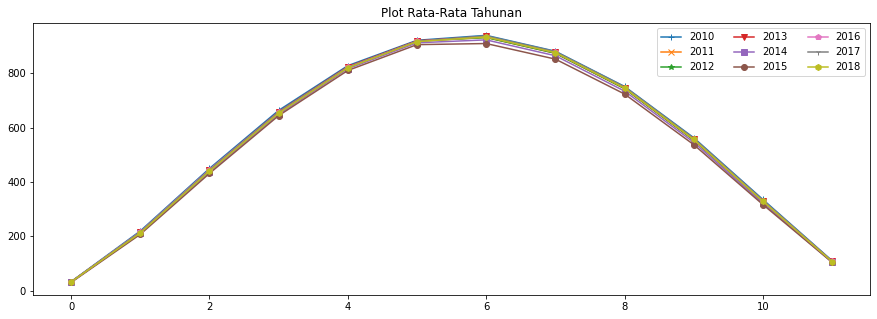

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (15, 5)


plt.plot(dff[2010],  '-+', label='2010')
plt.plot(dff[2011],  '-x', label='2011')
plt.plot(dff[2012],  '-*', label='2012')
plt.plot(dff[2013],  '-v', label='2013')
plt.plot(dff[2014],  '-s', label='2014')
plt.plot(dff[2015],  '-o', label='2015')
plt.plot(dff[2016],  '-p', label='2016')
plt.plot(dff[2017],  '-1', label='2017')
plt.plot(dff[2018],  '-h', label='2018')

plt.title('Plot Rata-Rata Tahunan')
plt.legend(fontsize=10,ncol=3)
plt.show()

**Mingguan**

In [ ]:
minggu = df[:84].reset_index()
minggu1 = df[84:168].reset_index()
minggu2 = df[168:252].reset_index()
minggu3 = df[252:336].reset_index()
minggu4 = df[336:420].reset_index()
minggu5 = df[420:504].reset_index()
minggu6 = df[504:588].reset_index()
minggu7 = df[588:672].reset_index()
minggu8 = df[672:756].reset_index()

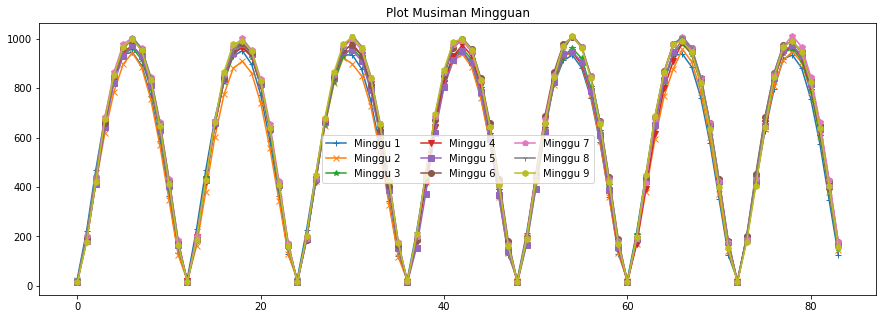

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (15, 5)


plt.plot(minggu['radiasi'],  '-+', label='Minggu 1')
plt.plot(minggu1['radiasi'],  '-x', label='Minggu 2')
plt.plot(minggu2['radiasi'],  '-*', label='Minggu 3')
plt.plot(minggu3['radiasi'],  '-v', label='Minggu 4')
plt.plot(minggu4['radiasi'],  '-s', label='Minggu 5')
plt.plot(minggu5['radiasi'],  '-o', label='Minggu 6')
plt.plot(minggu6['radiasi'],  '-p', label='Minggu 7')
plt.plot(minggu7['radiasi'],  '-1', label='Minggu 8')
plt.plot(minggu8['radiasi'],  '-h', label='Minggu 9')

plt.title('Plot Musiman Mingguan')
plt.legend(fontsize=10,ncol=3)
plt.show()

**Tahunan**

In [ ]:
tahun1 = df[:4368]
tahun1

,date,time,radiasi
0,2010,06:00:00,29.77
1,2010,07:00:00,220.42
2,2010,08:00:00,467.60
3,2010,09:00:00,682.42
4,2010,10:00:00,842.62
...,...,...,...
4363,2010,13:00:00,888.73
4364,2010,14:00:00,763.80
4365,2010,15:00:00,579.25
4366,2010,16:00:00,354.02


In [ ]:
tahun1 = df[:4368].reset_index()
tahun2 = df[4368:8736].reset_index()
tahun3 = df[8736:13104].reset_index()
tahun4 = df[13104:17472].reset_index()
tahun5 = df[17472:21840].reset_index()
tahun6 = df[21840:26208].reset_index()
tahun7 = df[26208:30576].reset_index()
tahun8 = df[30576:34944].reset_index()
tahun9 = df[34944:39312].reset_index()

Text(0, 0.5, 'Radiasi')

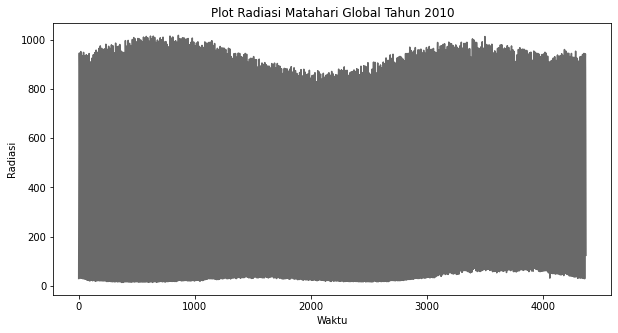

In [ ]:
import matplotlib as plt

ax = tahun1['radiasi'].plot(color='dimgrey',figsize=(10,5),title='Plot Radiasi Matahari Global Tahun 2010');
ax.set_xlabel("Waktu")
ax.set_ylabel("Radiasi")

Text(0, 0.5, 'Radiasi')

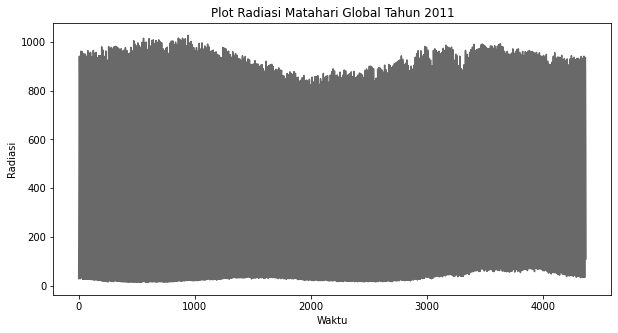

In [ ]:
import matplotlib as plt

ax = tahun2['radiasi'].plot(color='dimgrey',figsize=(10,5),title='Plot Radiasi Matahari Global Tahun 2011');
ax.set_xlabel("Waktu")
ax.set_ylabel("Radiasi")

Text(0, 0.5, 'Radiasi')

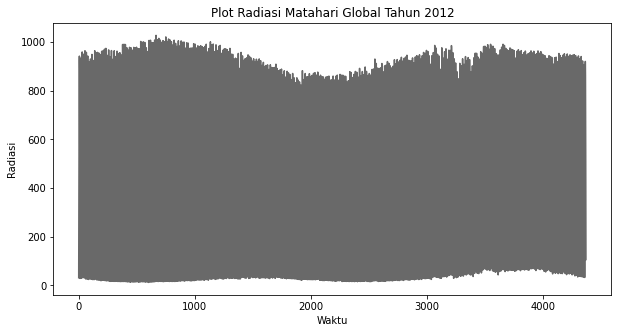

In [ ]:
import matplotlib as plt

ax = tahun3['radiasi'].plot(color='dimgrey',figsize=(10,5),title='Plot Radiasi Matahari Global Tahun 2012');
ax.set_xlabel("Waktu")
ax.set_ylabel("Radiasi")

Text(0, 0.5, 'Radiasi')

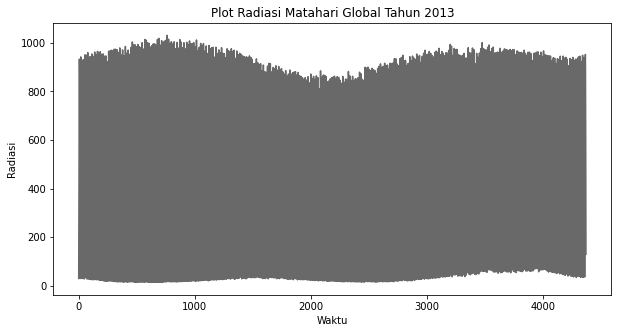

In [ ]:
import matplotlib as plt

ax = tahun4['radiasi'].plot(color='dimgrey',figsize=(10,5),title='Plot Radiasi Matahari Global Tahun 2013');
ax.set_xlabel("Waktu")
ax.set_ylabel("Radiasi")

Text(0, 0.5, 'Radiasi')

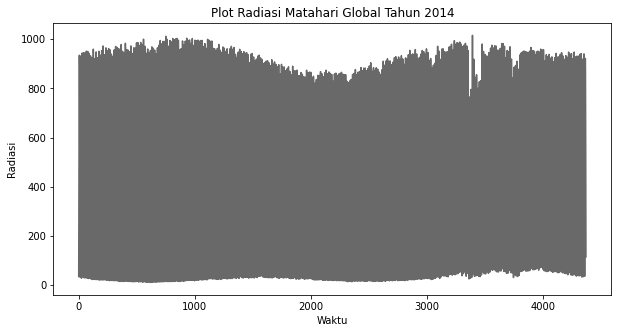

In [ ]:
import matplotlib as plt

ax = tahun5['radiasi'].plot(color='dimgrey',figsize=(10,5),title='Plot Radiasi Matahari Global Tahun 2014');
ax.set_xlabel("Waktu")
ax.set_ylabel("Radiasi")

Text(0, 0.5, 'Radiasi')

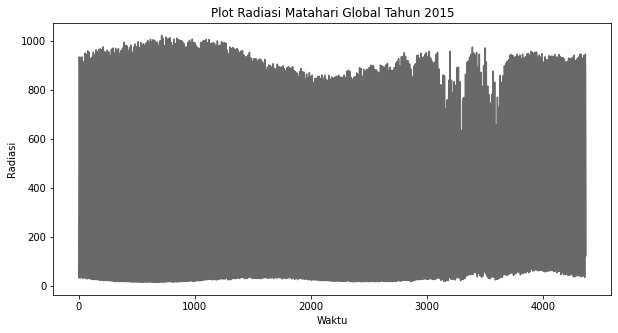

In [ ]:
import matplotlib as plt

ax = tahun6['radiasi'].plot(color='dimgrey',figsize=(10,5),title='Plot Radiasi Matahari Global Tahun 2015');
ax.set_xlabel("Waktu")
ax.set_ylabel("Radiasi")

Text(0, 0.5, 'Radiasi')

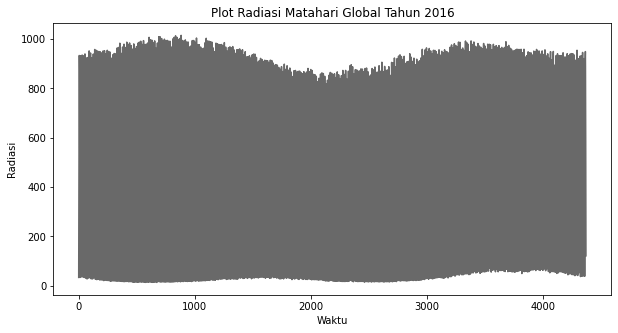

In [ ]:
import matplotlib as plt

ax = tahun7['radiasi'].plot(color='dimgrey',figsize=(10,5),title='Plot Radiasi Matahari Global Tahun 2016');
ax.set_xlabel("Waktu")
ax.set_ylabel("Radiasi")

Text(0, 0.5, 'Radiasi')

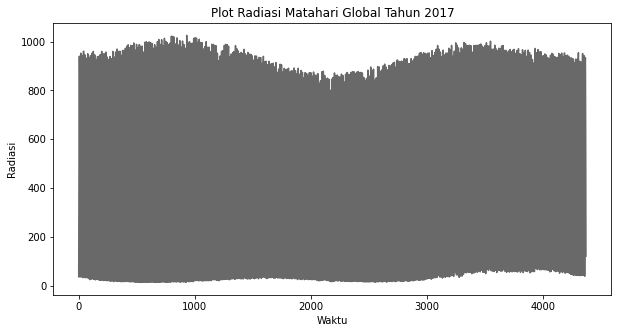

In [ ]:
import matplotlib as plt

ax = tahun8['radiasi'].plot(color='dimgrey',figsize=(10,5),title='Plot Radiasi Matahari Global Tahun 2017');
ax.set_xlabel("Waktu")
ax.set_ylabel("Radiasi")

Text(0, 0.5, 'Radiasi')

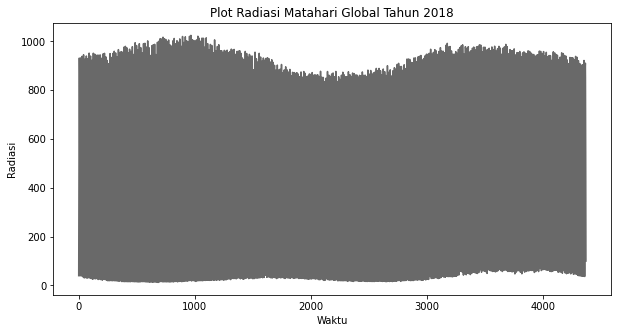

In [ ]:
import matplotlib as plt

ax = tahun9['radiasi'].plot(color='dimgrey',figsize=(10,5),title='Plot Radiasi Matahari Global Tahun 2018');
ax.set_xlabel("Waktu")
ax.set_ylabel("Radiasi")

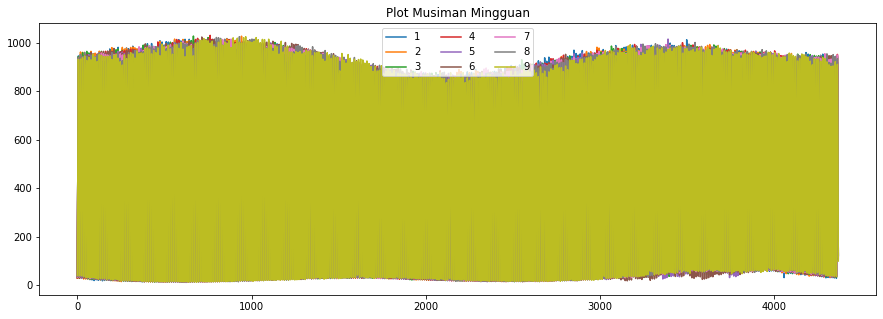

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (15, 5)


plt.plot(tahun1['radiasi'], label='1')
plt.plot(tahun2['radiasi'], label='2')
plt.plot(tahun3['radiasi'], label='3')
plt.plot(tahun4['radiasi'], label='4')
plt.plot(tahun5['radiasi'], label='5')
plt.plot(tahun6['radiasi'], label='6')
plt.plot(tahun7['radiasi'], label='7')
plt.plot(tahun8['radiasi'], label='8')
plt.plot(tahun9['radiasi'], label='9')

plt.title('Plot Musiman Mingguan')
plt.legend(fontsize=10,ncol=3)
plt.show()

Text(0, 0.5, 'Jumlah)')

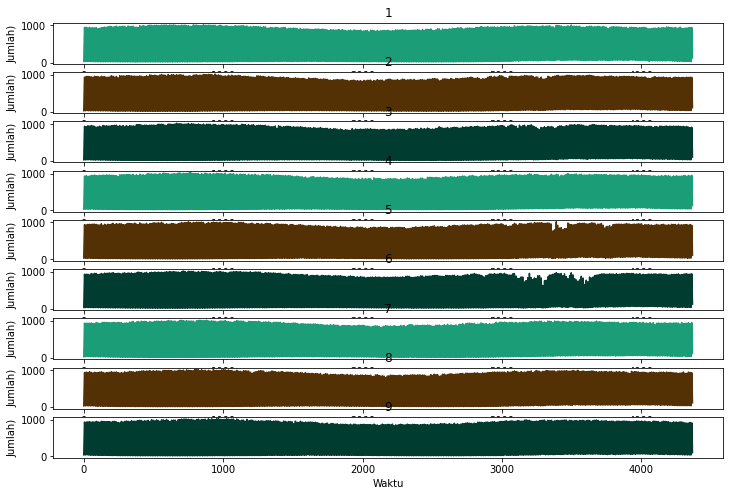

In [ ]:
fig, (ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9) = plt.subplots(9, 1, figsize=(30,36))
axa = tahun1['radiasi'].plot(colormap='Dark2',figsize=(12,8),title='1', ax=ax1);
axa.set_xlabel("Waktu")
axa.set_ylabel("Jumlah)")
axx = tahun2['radiasi'].plot(colormap='BrBG',figsize=(12,8),title='2', ax=ax2);
axx.set_xlabel("Waktu")
axx.set_ylabel("Jumlah)")
axy = tahun3['radiasi'].plot(colormap='BrBG_r',figsize=(12,8),title='3', ax=ax3);
axy.set_xlabel("Waktu")
axy.set_ylabel("Jumlah)")
axz = tahun4['radiasi'].plot(colormap='Dark2',figsize=(12,8),title='4', ax=ax4);
axz.set_xlabel("Waktu")
axz.set_ylabel("Jumlah)")
axb = tahun5['radiasi'].plot(colormap='BrBG',figsize=(12,8),title='5', ax=ax5);
axb.set_xlabel("Waktu")
axb.set_ylabel("Jumlah)")
axc = tahun6['radiasi'].plot(colormap='BrBG_r',figsize=(12,8),title='6', ax=ax6);
axc.set_xlabel("Waktu")
axc.set_ylabel("Jumlah)")
axd = tahun7['radiasi'].plot(colormap='Dark2',figsize=(12,8),title='7', ax=ax7);
axd.set_xlabel("Waktu")
axd.set_ylabel("Jumlah)")
axe = tahun8['radiasi'].plot(colormap='BrBG',figsize=(12,8),title='8', ax=ax8);
axe.set_xlabel("Waktu")
axe.set_ylabel("Jumlah)")
axf = tahun9['radiasi'].plot(colormap='BrBG_r',figsize=(12,8),title='9', ax=ax9);
axf.set_xlabel("Waktu")
axf.set_ylabel("Jumlah)")

**Box Cox Transformation**

In [ ]:
#load data actual
datain = pd.read_csv('insample.txt', sep=';', header=0, low_memory=False)
di = datain
di

,date,time,radiasi
0,01/01/2010,06:00:00,29.77
1,01/01/2010,07:00:00,220.42
2,01/01/2010,08:00:00,467.60
3,01/01/2010,09:00:00,682.42
4,01/01/2010,10:00:00,842.62
...,...,...,...
46399,02/08/2020,13:00:00,831.25
46400,02/08/2020,14:00:00,713.83
46401,02/08/2020,15:00:00,542.40
46402,02/08/2020,16:00:00,330.98


Lambda: 0.821712


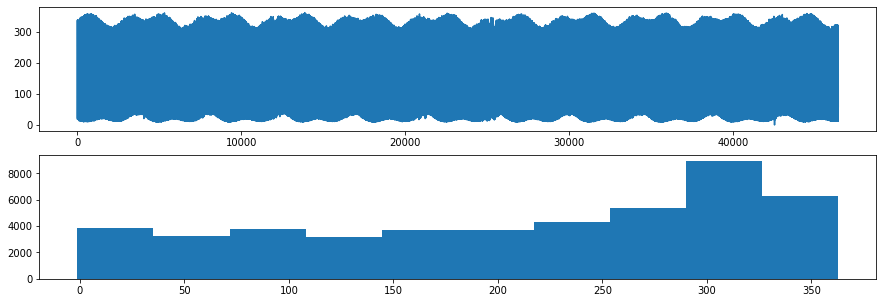

In [ ]:
from scipy.stats import boxcox

di['radiasi'], lam = boxcox(di['radiasi'])
print('Lambda: %f' % lam)
pyplot.figure(1)
# line plot
pyplot.subplot(211)
pyplot.plot(di['radiasi'])
# histogram
pyplot.subplot(212)
pyplot.hist(di['radiasi'])
pyplot.show()

In [ ]:
#load data actual
data2 = pd.read_csv('transformasi.txt', sep=';', header=0, low_memory=False)
dt = data2
dt

,radiasi
0,15.101604
1,74.920523
2,136.741268
3,185.029680
4,219.030912
...,...
46399,216.663287
46400,191.812028
46401,153.976961
46402,103.714959


Lambda: 1.027140


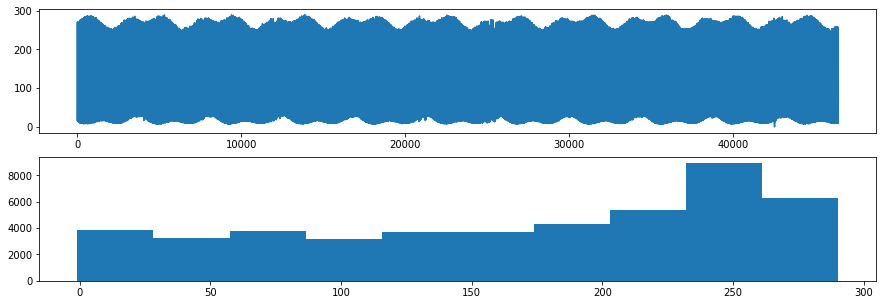

In [ ]:
from scipy.stats import boxcox

dt['radiasi'], lam = boxcox(dt['radiasi'])
print('Lambda: %f' % lam)
pyplot.figure(1)
# line plot
pyplot.subplot(211)
pyplot.plot(dt['radiasi'])
# histogram
pyplot.subplot(212)
pyplot.hist(dt['radiasi'])
pyplot.show()

**Visualisasi Plot ACF dan PACF**

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


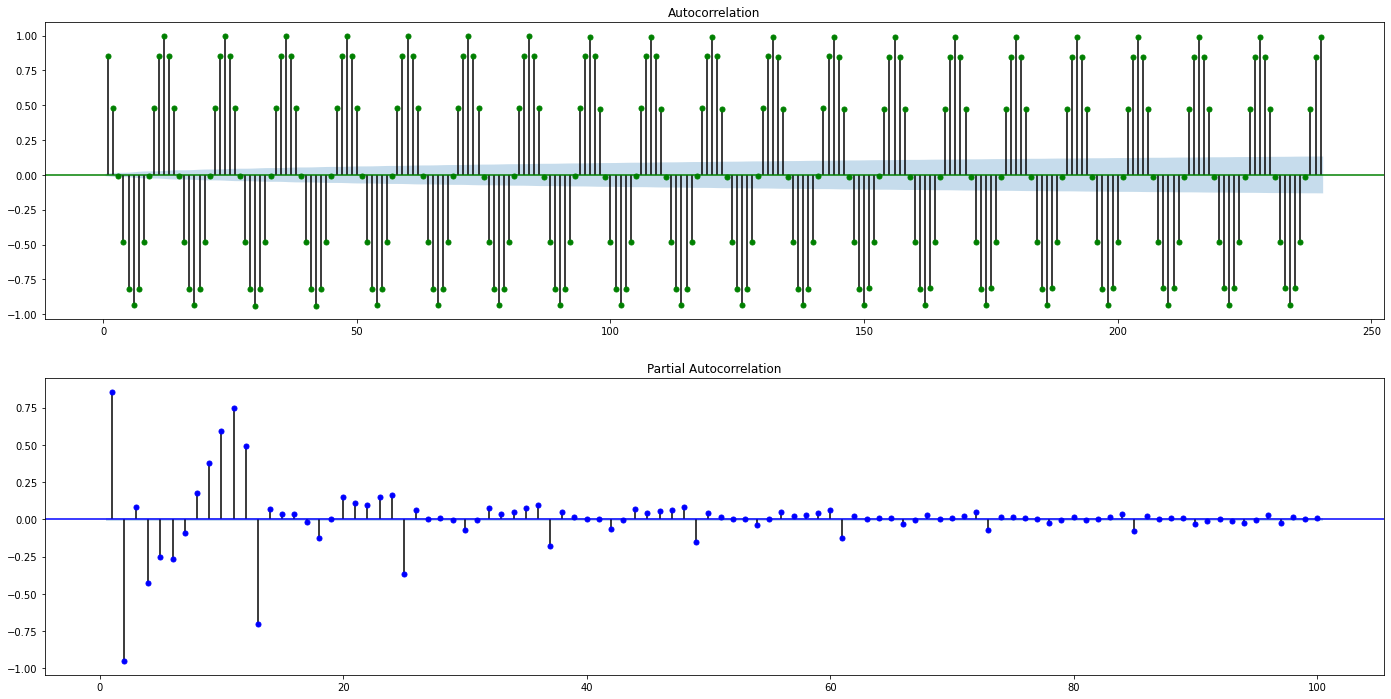

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = (35, 5)
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Create figure
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(24,12))

# Plot the ACF of data
acf=plot_acf(df['radiasi'], lags=240, zero=False, ax=ax1, color='green');


# Plot the PACF of data
pacf=plot_pacf(df['radiasi'], lags=100, zero=False, ax=ax2, color='blue');

In [ ]:
#load data actual
data2 = pd.read_csv('transformasi.txt', sep=';', header=0, low_memory=False)
dt = data2
dt

,radiasi
0,6.455294
1,17.980850
2,30.708062
3,42.211882
4,49.000206
...,...
39439,55.938717
39440,50.748503
39441,36.916885
39442,29.903148


In [ ]:
#load data actual
data3 = pd.read_csv('differencing.txt', sep=';', header=0, low_memory=False)
ds = data3
ds

,differencing
0,*
1,11.52555539
2,12.72721268
3,11.50381915
4,6.788324759
...,...
39439,-3.129357542
39440,-5.190213851
39441,-13.83161819
39442,-7.013736849
